In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
df = pd.read_csv("../Link-Feedback -august-dump (1).csv")
os = "Android"
version = "2.16.1"
df = df[df["Device OS"].str.contains(os)]
df["Version Name"].value_counts()
df["Operator"].value_counts()
# df = df[df["Version Name"].str.contains(version)]

FileNotFoundError: [Errno 2] No such file or directory: '../Link-Feedback -august-dump (1).csv'

In [ ]:
def autopct_format(values):
        def custom_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return custom_format
def pie_chart(column):
    s = df[column].value_counts().sort_index()
    if column == "Rating":
        c = ["red", "brown", "orange", "purple", "blue", "green"]
        e = (0, 0, 0, 0, 0, 0.1) 
        plt.pie(s, labels=s.index, autopct=autopct_format(s), colors=c, explode=e)
    else:
        plt.pie(s, labels=s.index, autopct=autopct_format(s))

    plt.title(column + " Percentage: " + (os + ": " + version))
    plt.show()


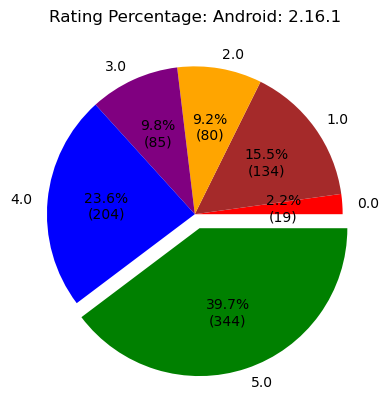

In [ ]:
# Case 1: show percentage of rating for 
pie_chart("Rating")


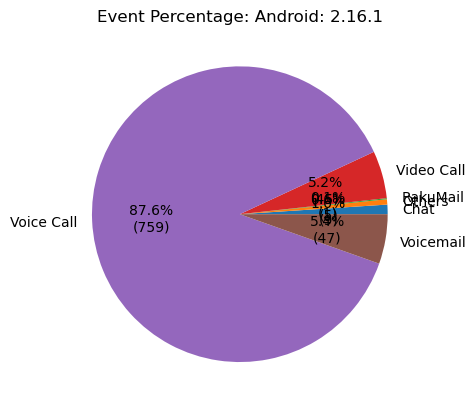

In [ ]:
# Case 2: show percentage of event for 
pie_chart("Event")

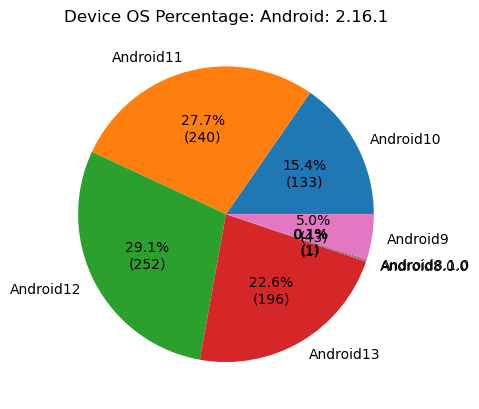

In [ ]:
# Case 3: show percentage of android version for 
pie_chart("Device OS")

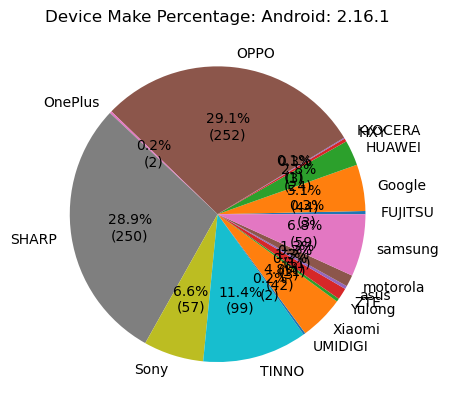

In [ ]:
# Case 4: show percentage of device maker
pie_chart("Device Make")

/Users/linh.truong/anaconda3/envs/pandas_playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/linh.truong/anaconda3/envs/pandas_playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/linh.truong/anaconda3/envs/pandas_playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/linh.truong/anaconda3/envs/pandas_playground/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/linh.truong/anaconda3/envs/pandas_playground/

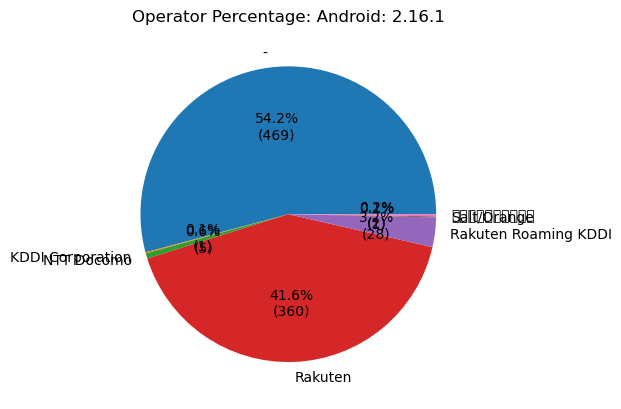

In [ ]:

# Case 5: show percentage of operator
pie_chart("Operator")

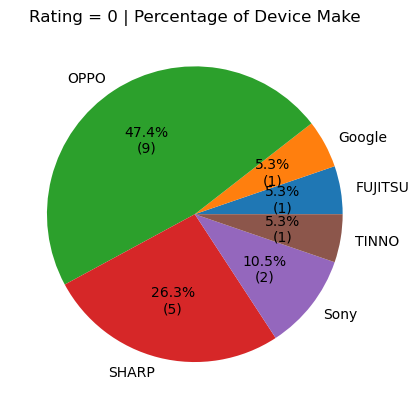

In [ ]:
def pie_chart_rating_based(rating, column):
    newDf = df[df["Rating"] == rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating = " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based(0, "Device Make")

# df[df["Rating"] == 0].value_counts().sort_index()

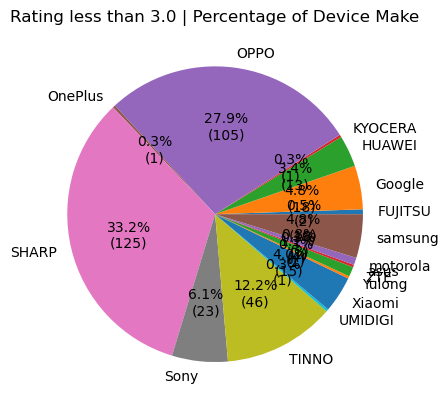

In [ ]:
def pie_chart_rating_based_comparision(rating, column):
    newDf = df[df["Rating"] <= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating less than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based_comparision(3.0, "Device Make")

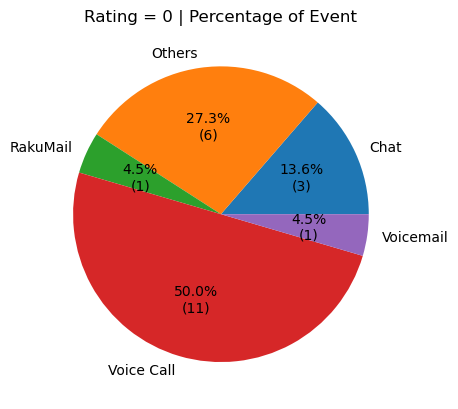

In [ ]:
def pie_chart_issue_type_based_rating_equal(rating, column):
    newDf = df[df["Rating"] == rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating = " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating_equal(0, "Event")

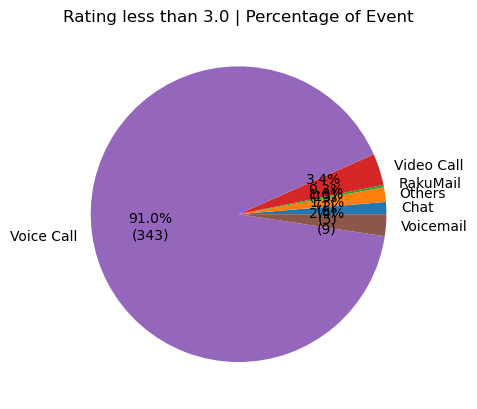

In [ ]:
def pie_chart_issue_type_based_rating(rating, column):
    newDf = df[df["Rating"] <= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating less than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating(3.0, "Event")

# test = df[df["Rating"] >= 3.0]
# test.head(5)
# s = test["Event"].value_counts().sort_index()
# s

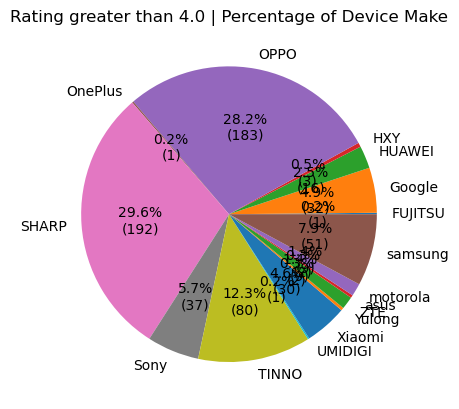

In [ ]:
def pie_chart_rating_based_comparision_greater(rating, column):
    newDf = df[df["Rating"] >= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating greater than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based_comparision_greater(4.0, "Device Make")

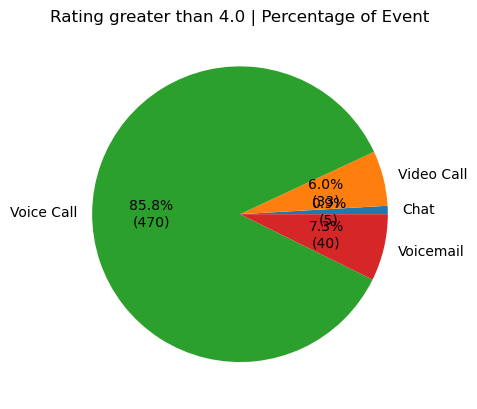

In [ ]:
def pie_chart_issue_type_based_rating(rating, column):
    newDf = df[df["Rating"] >= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating greater than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating(4.0, "Event")

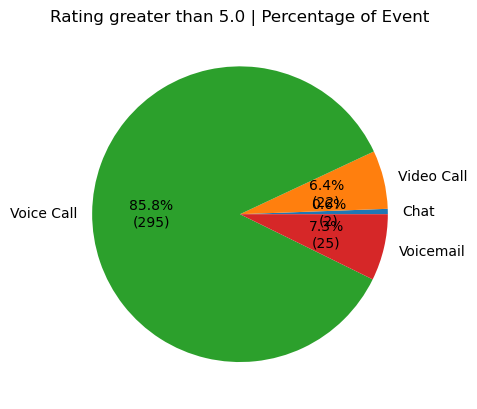

In [ ]:
pie_chart_issue_type_based_rating(5.0, "Event")

Addign value: Call dropped : 165
Addign value: Poor audio : 192
Addign value: No audio : 53
Addign value: Unable to make call : 46


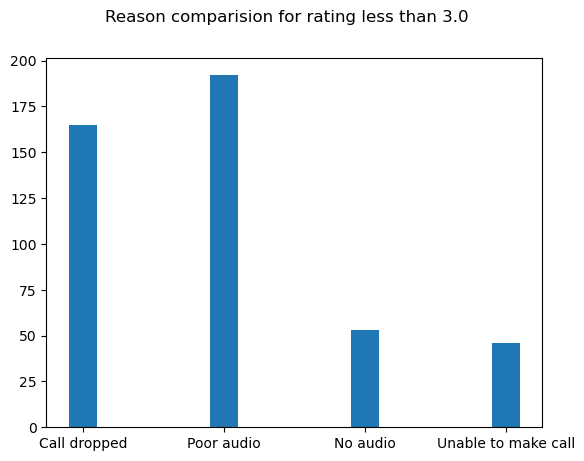

In [ ]:
def bar_chart_reason_type_based_rating(rating):
    newDf = df[df["Rating"] <= rating]
    dict = {}
    for type in ["Call dropped", "Poor audio", "No audio", "Unable to make call"]:
        s = newDf[newDf["Specifics"].str.contains(type)] 
        dict[type] = len(s.index)
        print("Addign value: " + str(type) + " : " + str(len(s.index)))
    plt.suptitle("Reason comparision for rating less than " + str(rating))
    plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()

bar_chart_reason_type_based_rating(3.0)

